In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels,
    epochs=3,
    validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)




Epoch 1/3


1563/1563 [==============================] - 9s 5ms/step - loss: 0.2958 - accuracy: 0.9121 - val_loss: 0.1605 - val_accuracy: 0.9501
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1624 - accuracy: 0.9536 - val_loss: 0.1138 - val_accuracy: 0.9676
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


In [2]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
        name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

In [3]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
    epochs=3,
    validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2965 - accuracy: 0.9120 - rmse: 7.1782 - val_loss: 0.1437 - val_accuracy: 0.9583 - val_rmse: 7.3593
Epoch 2/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1612 - accuracy: 0.9537 - rmse: 7.3484 - val_loss: 0.1094 - val_accuracy: 0.9679 - val_rmse: 7.3966
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1012 - accuracy: 0.9718 - rmse: 7.4346


In [6]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels,
    epochs=20,
    callbacks=callbacks_list,
    validation_data=(val_images, val_labels))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2946 - accuracy: 0.9127 - val_loss: 0.1407 - val_accuracy: 0.9601
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1599 - accuracy: 0.9539 - val_loss: 0.1088 - val_accuracy: 0.9685
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1272 - accuracy: 0.9643 - val_loss: 0.1029 - val_accuracy: 0.9731
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1115 - accuracy: 0.9694 - val_loss: 0.1008 - val_accuracy: 0.9740
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1041 - accuracy: 0.9710 - val_loss: 0.0955 - val_accuracy: 0.9768
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0944 - accuracy: 0.9749 - val_loss: 0.0895 - val_accuracy: 0.9772
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0867 - accuracy: 0.9767 - val_loss: 0.0892 - val_accuracy:

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2950 - accuracy: 0.9122 - val_loss: 0.1523 - val_accuracy: 0.9577
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1602 - accuracy: 0.9536 - val_loss: 0.1217 - val_accuracy: 0.9648
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1293 - accuracy: 0.9629 - val_loss: 0.1063 - val_accuracy: 0.9707
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1142 - accuracy: 0.9679 - val_loss: 0.0977 - val_accuracy: 0.9751
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1021 - accuracy: 0.9719 - val_loss: 0.0967 - val_accuracy: 0.9768
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0978 - accuracy: 0.9734 - val_loss: 0.0920 - val_accuracy: 0.9785
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0877 - accuracy: 0.9760 - val_loss: 0.0916 - val_accuracy:

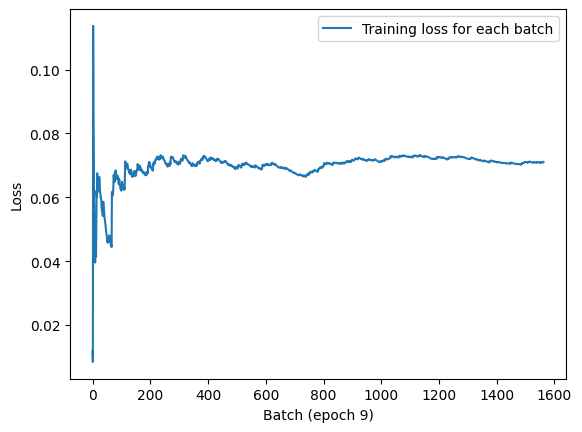

In [12]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

model = get_mnist_model()
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels,
    epochs=10,
    callbacks=[LossHistory()],
    validation_data=(val_images, val_labels))

In [8]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
tensorboard = keras.callbacks.TensorBoard(
    log_dir="log",
)
model.fit(train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2958 - accuracy: 0.9111 - val_loss: 0.1485 - val_accuracy: 0.9588
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1598 - accuracy: 0.9534 - val_loss: 0.1162 - val_accuracy: 0.9691
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1285 - accuracy: 0.9642 - val_loss: 0.1128 - val_accuracy: 0.9705
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1132 - accuracy: 0.9685 - val_loss: 0.0979 - val_accuracy: 0.9741
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1028 - accuracy: 0.9724 - val_loss: 0.0967 - val_accuracy: 0.9765
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0913 - accuracy: 0.9749 - val_loss: 0.0912 - val_accuracy: 0.9773
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0868 - accuracy: 0.9768 - val_loss: 0.0910 - val_accuracy:

In [9]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [10]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


In [13]:
model = get_mnist_model()
loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

In [14]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [15]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9139
...loss: 0.2916
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9545
...loss: 0.1617
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9633
...loss: 0.1313


In [16]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9695
...val_loss: 0.1171


In [17]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

@property
def metrics(self):
    return [loss_tracker]

In [18]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)
model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4437
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2512
Epoch 3/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2065


In [19]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions) # 利用 self.compiled_loss 计算损失
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions) # 通过 self.compiled_metrics 更新模型指标
        return {m.name: m.result() for m in self.metrics}

inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)
model.compile(optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2939 - sparse_categorical_accuracy: 0.9129
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1612 - sparse_categorical_accuracy: 0.9530
Epoch 3/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1332 - sparse_categorical_accuracy: 0.9619
